## Implementando classificação de imagens com arquitetura CNN (Convolutional Neural Network)

Diego Hartwig - 2024

## Importações das bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Carregando a base de dados

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## Normalização da base de dados

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

x_train.shape (50000, 32, 32, 3)
x_test.shape (10000, 32, 32, 3)
y_train.shape (50000,)
y_test.shape (10000,)


## Criando a Rede

In [4]:
K = len(set(y_train))

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

## Exibindo os dados

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1024)              118067

## Compilação e Treinamento do modelo

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 15s 6ms/step - loss: 1.5542 - accuracy: 0.4303 - val_loss: 1.3301 - val_accuracy: 0.5090
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2589 - accuracy: 0.5442 - val_loss: 1.0910 - val_accuracy: 0.6086
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1291 - accuracy: 0.5959 - val_loss: 1.0384 - val_accuracy: 0.6360
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0371 - accuracy: 0.6295 - val_loss: 0.9307 - val_accuracy: 0.6723
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9604 - accuracy: 0.6576 - val_loss: 0.9304 - val_accuracy: 0.6762
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9005 - accuracy: 0.6804 - val_loss: 0.8755 - val_accuracy: 0.6949
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8502 - accuracy: 0.6986 - val_loss: 0.8661 - val_accuracy

## Exibindo gráfico de perda e acurácia

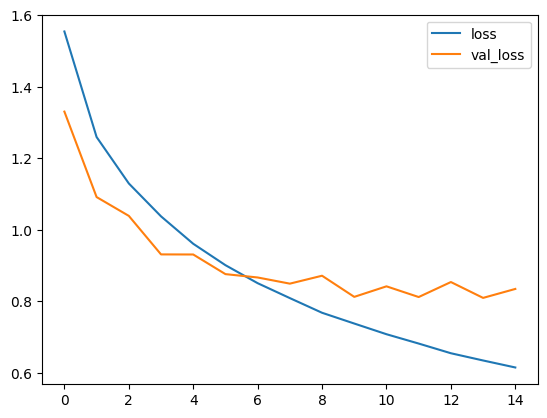

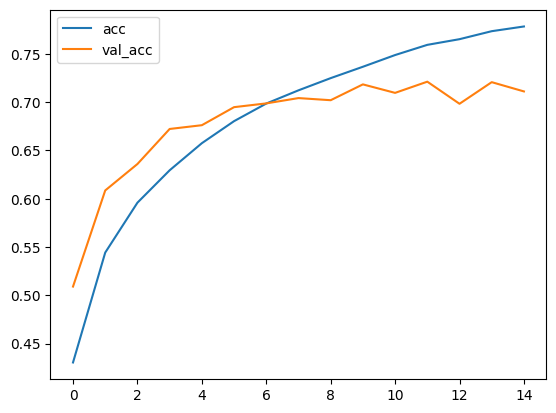

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

## Predição

313/313 [==============================] - 1s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

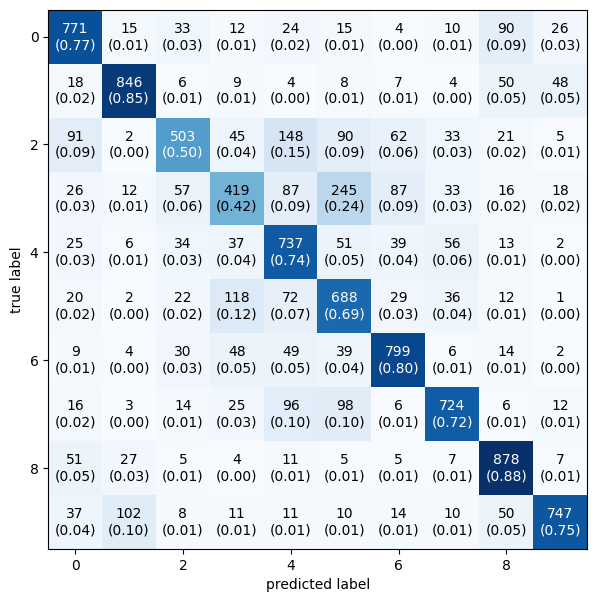

In [8]:
y_pred = model.predict(x_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), show_normed=True)

## Classificações erradas

Text(0.5, 1.0, 'True label: cat Predicted: dog')

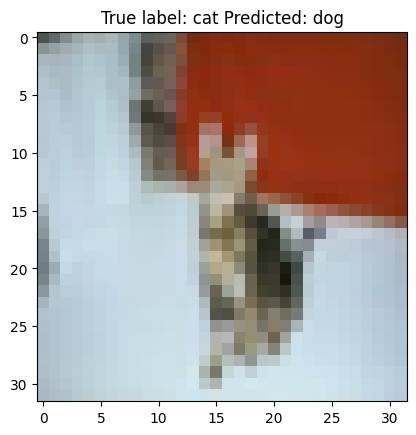

In [9]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

misclassified = np.where(y_pred != y_test)[0]

i = np.random.choice(misclassified)

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))
